# Hybrid Rocket Motors

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Module used to parse and work with units
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity

# for convenience:
def to_si(quant):
    '''Converts a Pint Quantity to magnitude at base SI units.
    '''
    return quant.to_base_units().magnitude

In [3]:
# these lines are only for helping improve the display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 150
plt.rcParams['savefig.dpi'] = 150

:::{figure-md} hybrid-regression-data
<img src="../images/hybrid-rocket-htpb.*" alt="Hybrid rocket HTPB/GOX fuel regression rate" class="bg-primary mb-1" width="500px" align="center">

Experimental data and fits for HTPB/GOX fuel regression rate as a function of oxidizer mass flux. 
Source: Sutton and Biblarz {cite}`sutton2016rocket`.
:::

In [3]:
data = np.genfromtxt('hybrid-htpb-regression.csv', delimiter=',')

In [11]:
from scipy.optimize import least_squares

def func(param, Go, rdot):
    ''' rdot = a * Go^n
    '''
    return rdot - param[0] * np.power(Go, param[1])

In [12]:
res = least_squares(func, [0.1, 0.5], args=(data[:,0], data[:,1]))

In [13]:
res.x

array([0.1058803 , 0.69835809])

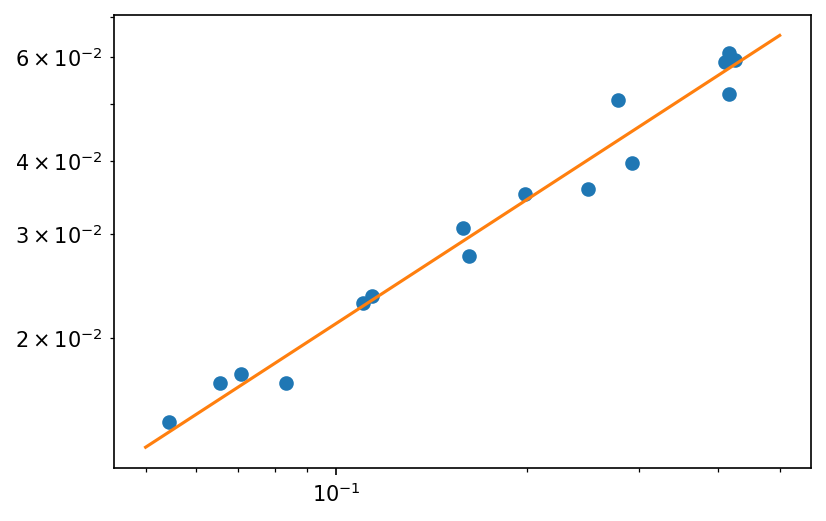

In [16]:
plt.loglog(data[:,0], data[:,1], 'o')
Go = np.geomspace(0.05, 0.5, endpoint=True)
rdot = res.x[0] * np.power(Go, res.x[1])
plt.loglog(Go, rdot)